In [1]:
# native
import os, sys
import pandas as pd 
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# local
sys.path.append("..")
from data.loader import SimulatedSpectralData
from data.splitter import Splitter

def make_visdf(X, y, seasons):
    df = pd.DataFrame(X).reset_index()
    df["season"] = seasons
    df["y"] = y
    df["y_cls"] = y > np.median(y)
    df = df.melt(id_vars=["index", "season", "y_cls", "y"], var_name="spectra", value_name="reflectance")
    return df

In [2]:
n = 30
spectral_data = SimulatedSpectralData()
X, y = spectral_data.sample(n, seed=24061)
Tu = spectral_data.Tu
Pu = spectral_data.Pu
Xu = spectral_data.Xu
Td = spectral_data.Td
Pd = spectral_data.Pd
Xd = spectral_data.Xd
X = spectral_data.X
y = spectral_data.y

In [3]:
X.std()

0.6756574557834625

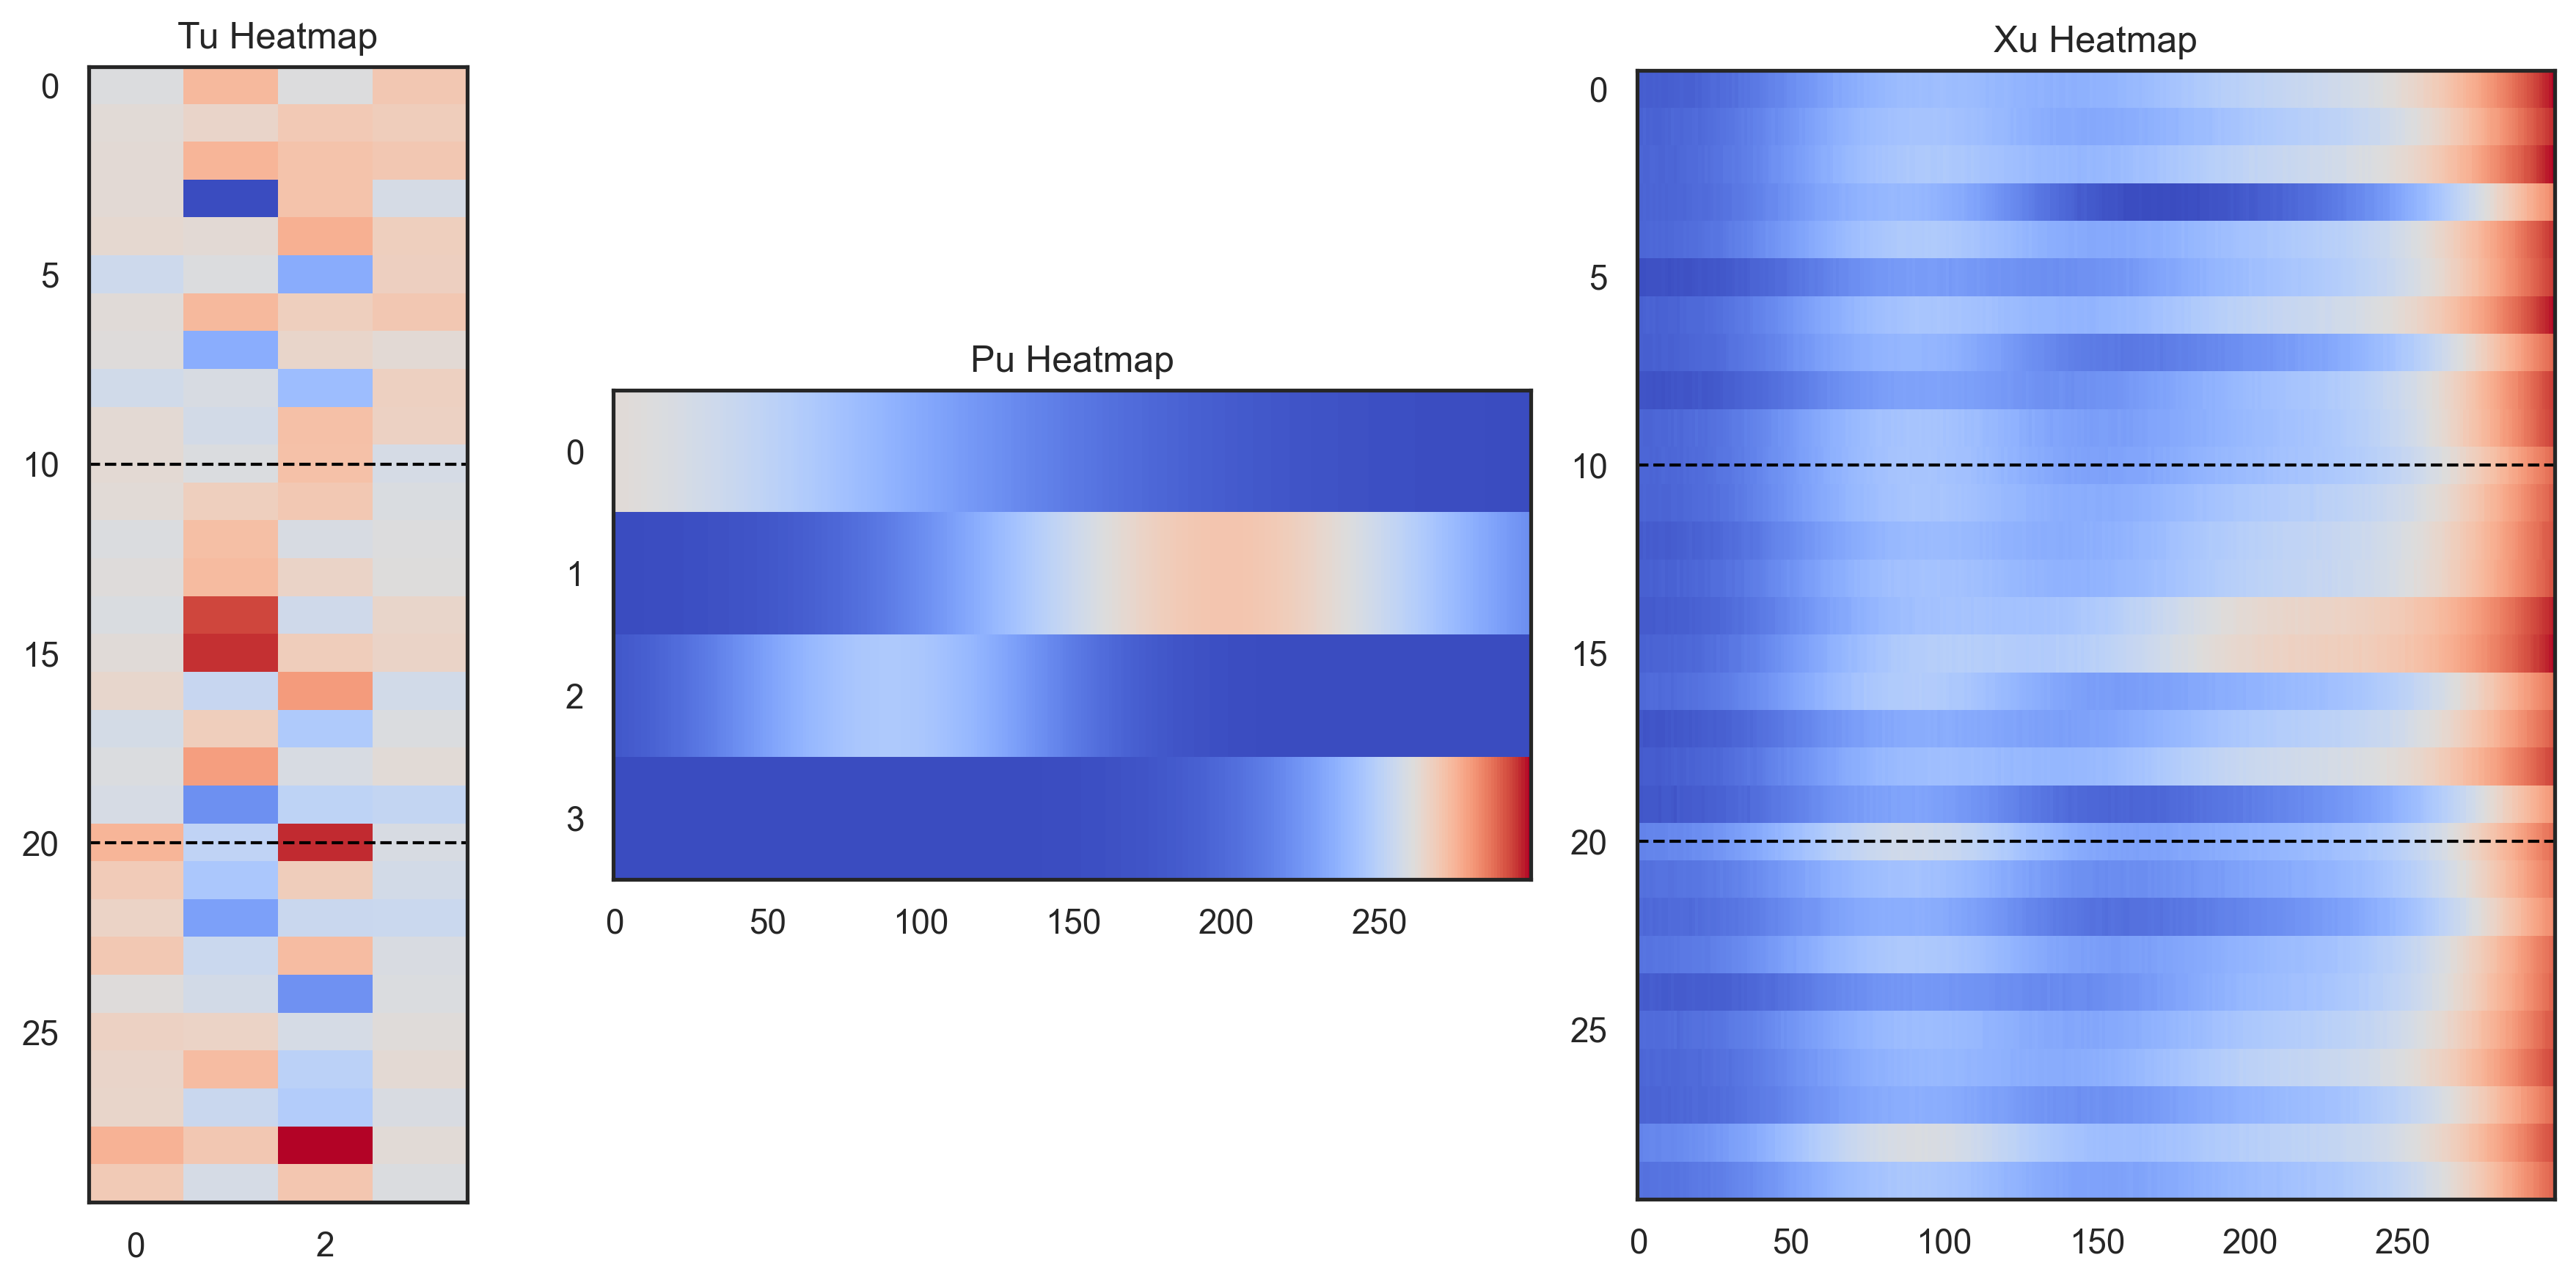

In [3]:
sns.set(style="white")

fig, axes = plt.subplots(nrows=1, ncols=3, 
                        dpi=300,
                        figsize=(12, 6),
                        gridspec_kw={'width_ratios': [1, 2, 2]})

T = np.concatenate((Tu, Td), axis=1)
P = np.concatenate((Pu, Pd), axis=0)

axes[0].imshow(T, cmap='coolwarm', aspect=1/2.5, interpolation="None")
axes[1].imshow(P, cmap='coolwarm', aspect=40, interpolation="None")
axes[2].imshow(X, cmap='coolwarm',  aspect=12.3, interpolation="None")

# First subplot (Tu)
axes[0].axhline(10, color='black', linewidth=1, linestyle='--')
axes[0].axhline(20, color='black', linewidth=1, linestyle='--')
axes[0].set_title("Tu Heatmap")
# Second subplot (Pu)
axes[1].set_xticks(np.arange(0, Pd.shape[1], step=50))
axes[1].set_title("Pu Heatmap")
# Xu
axes[2].axhline(10, color='black', linewidth=1, linestyle='--')
axes[2].axhline(20, color='black', linewidth=1, linestyle='--')
axes[2].set_xticks(np.arange(0, Xd.shape[1], step=50))
axes[2].set_title("Xu Heatmap")

plt.tight_layout()
plt.show()

<Axes: xlabel='spectra', ylabel='reflectance'>

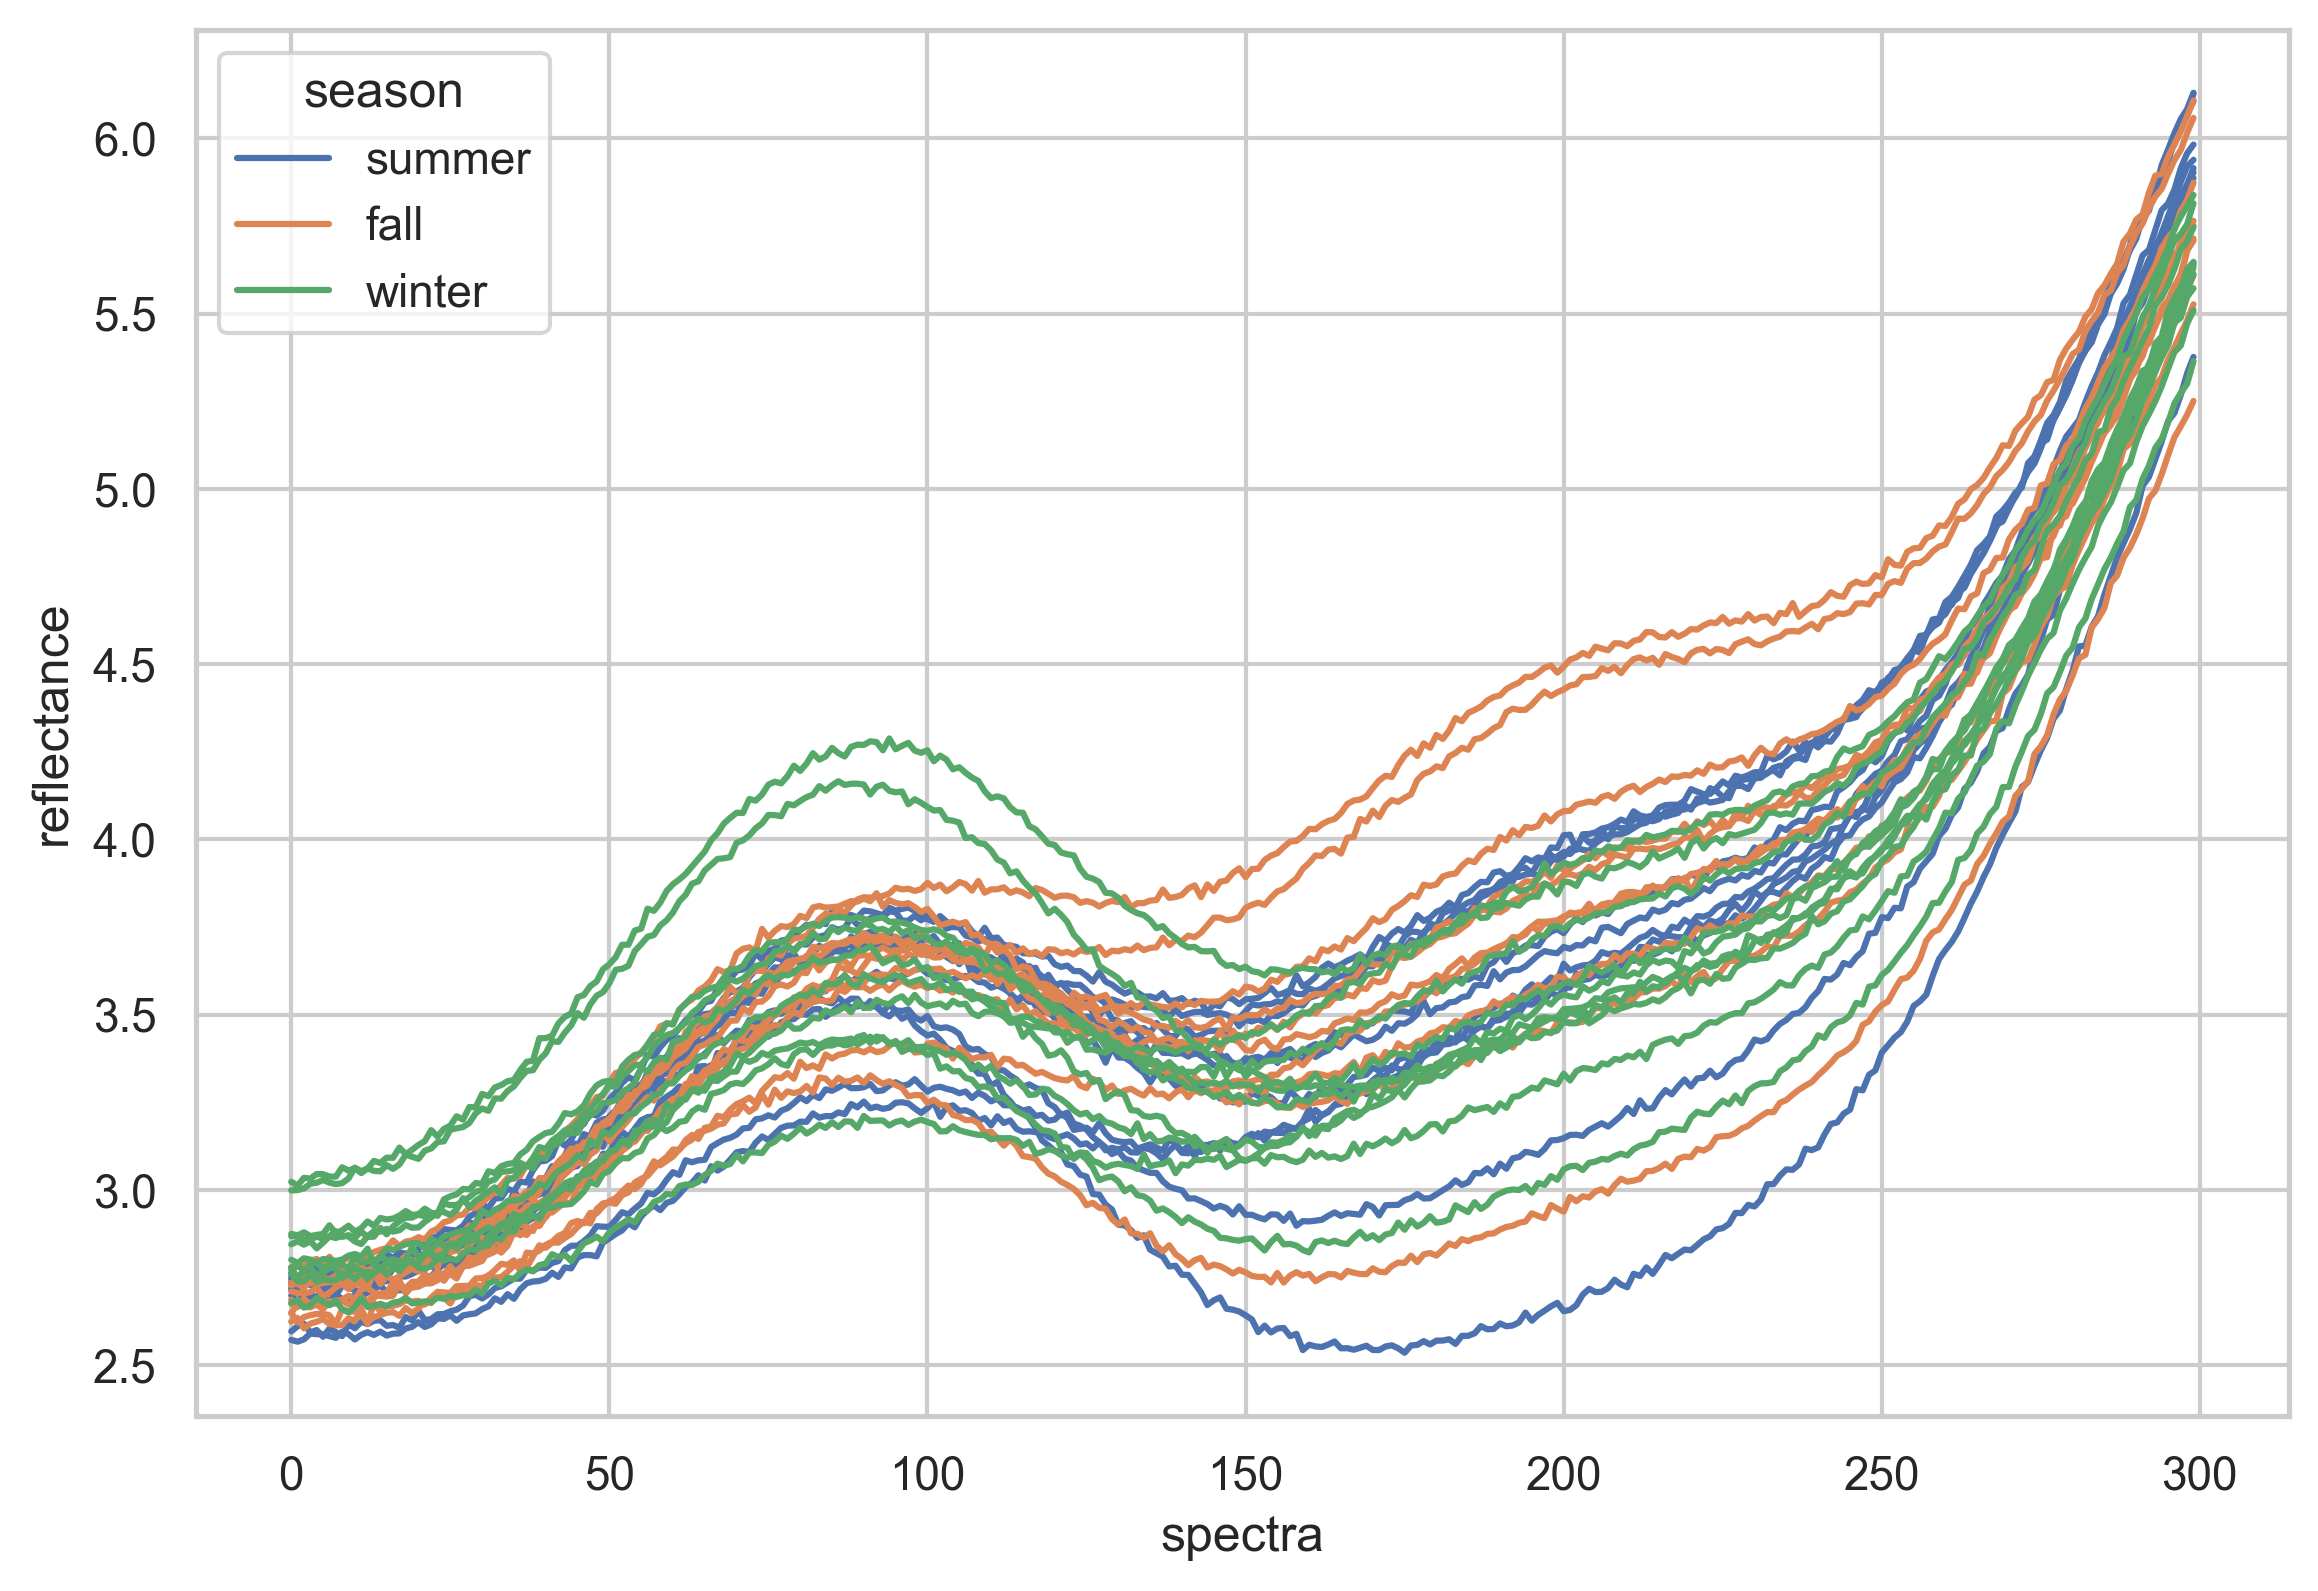

In [4]:
n_eff = n // 3
seasons = ["summer"] * n_eff + ["fall"] * n_eff + ["winter"] * n_eff
# df_u = make_visdf(Xu, y, seasons)
# df_d = make_visdf(Xd, y, seasons)
df = make_visdf(X, y, seasons)
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#FCDE9C", "#DC3977"]
plt.figure(figsize=(9, 6), dpi=300)
sns.lineplot(x="spectra", y="reflectance", hue="season", data=df, 
             units='index', estimator=None)

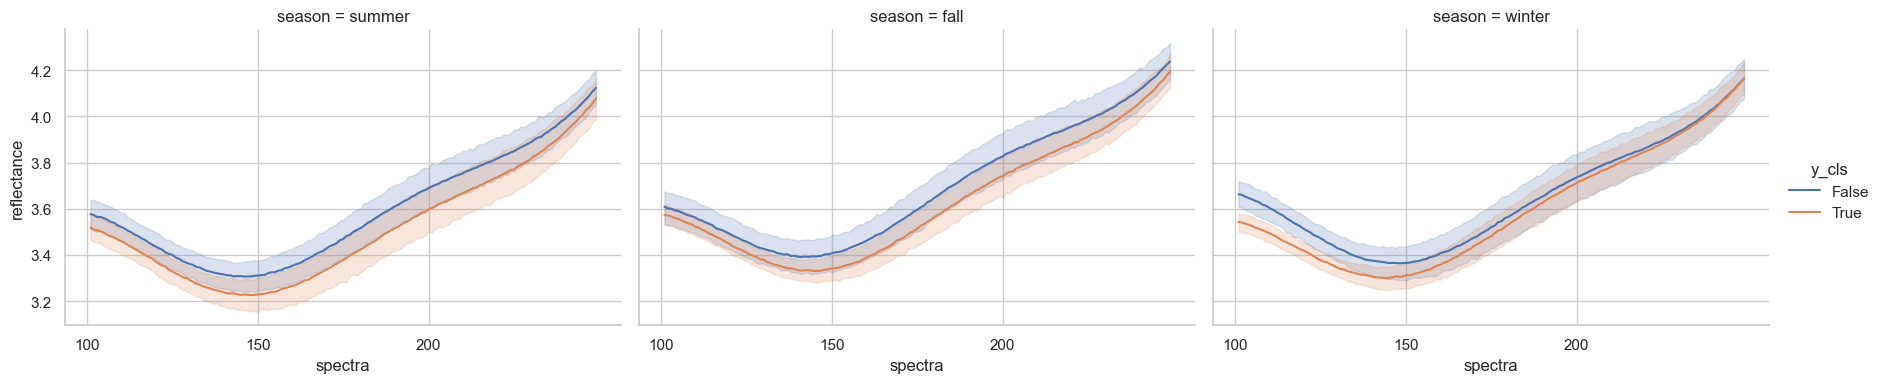

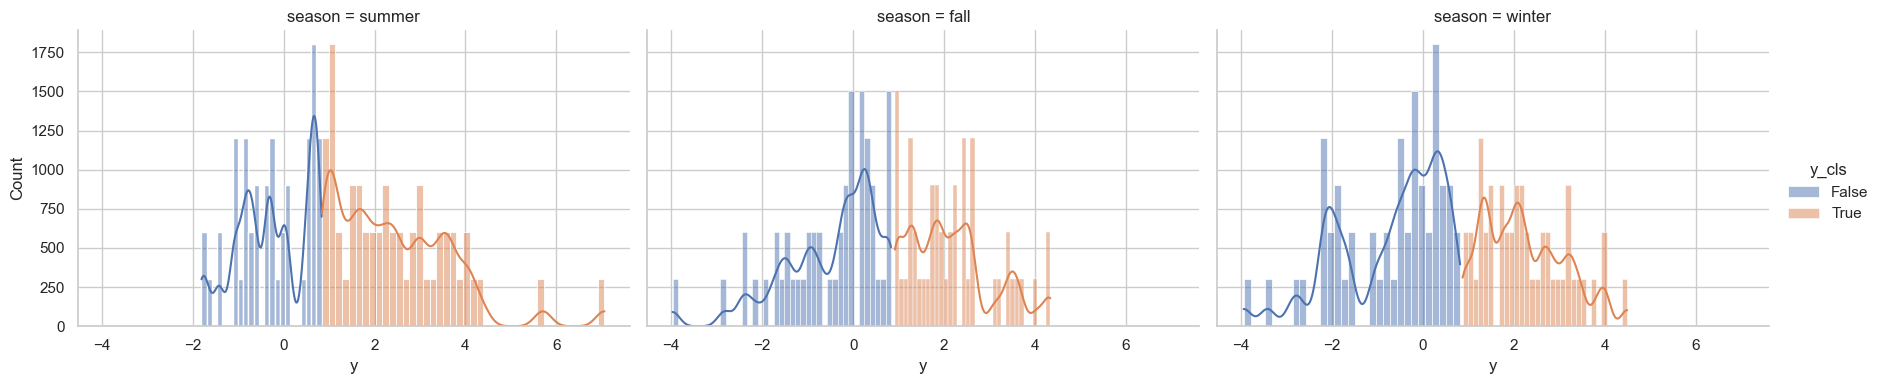

In [2]:
n = 300
spectral_data = SimulatedSpectralData()
X, y = spectral_data.sample(n, seed=24061)
n_eff = n // 3
ls_season = ["summer", "fall", "winter"]
seasons = [ls_season[i % 3] for i in range(n)]

df = make_visdf(X, y, seasons)
df["spectra"] = df["spectra"].astype(int)
param = {"aspect": 1.5, "height": 4, "hue": "y_cls"}

sns.set_theme(style="whitegrid")
g = sns.FacetGrid(df.query("spectra < 250 and spectra > 100"),
    col="season", col_order=ls_season, 
    **param)
g.set(xticks=[i for i in range(100, 250, 50)])
g.set_xlabels("Spectral Band")
g.set_ylabels("Reflectance")
g.map(sns.lineplot, "spectra", "reflectance")
g.add_legend()

g = sns.FacetGrid(df,
    col="season", col_order=ls_season, 
    **param)
g.map(sns.histplot, "y", kde=True, )
g.add_legend()

<Axes: >

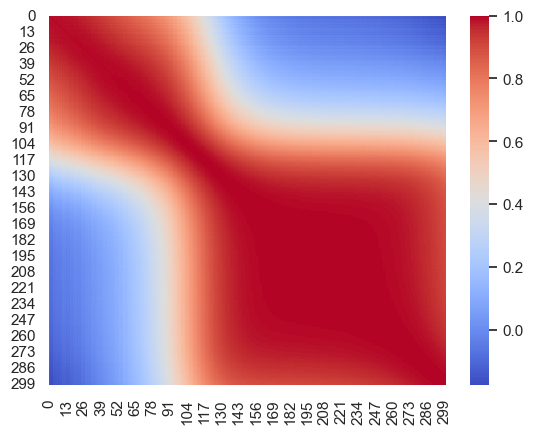

In [3]:
cor_X = pd.DataFrame(X).corr()
sns.heatmap(cor_X, cmap="coolwarm", linecolor='black')

In [4]:
data_grouped = df.groupby(["season", "y_cls"]).agg(
    count=("index", "count"),
    mean=("y", "mean"),
    median=("y", "median"),
    std=("y", "std")
).reset_index()
data_grouped

,season,y_cls,count,mean,median,std
0,fall,False,13800,-1.143367,-0.779891,1.197187
1,fall,True,16200,2.092581,1.998994,0.973185
2,summer,False,15600,-0.631116,-0.416716,1.001782
3,summer,True,14400,2.026804,1.753519,1.141155
4,winter,False,15600,-1.302802,-1.169818,1.285435
5,winter,True,14400,2.147127,2.010432,1.158962


/var/folders/0k/_fn4_dgn04b2b44_sfhbshzr0000gp/T/ipykernel_22842/4167313626.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ft.loc[:, "y"] = spectral_data.y


<Axes: >

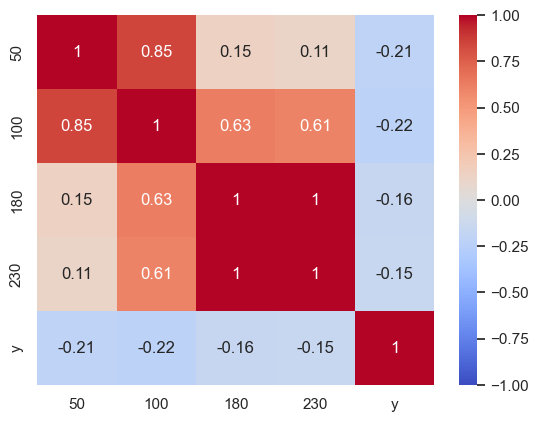

In [5]:
idx_nonlinear = [50, 100, 180, 230]
idx = idx_nonlinear
idx.sort()
dfX = pd.DataFrame(X)
X_ft = dfX.iloc[:, idx]
X_ft.loc[:, "y"] = spectral_data.y
corr = X_ft.corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True)

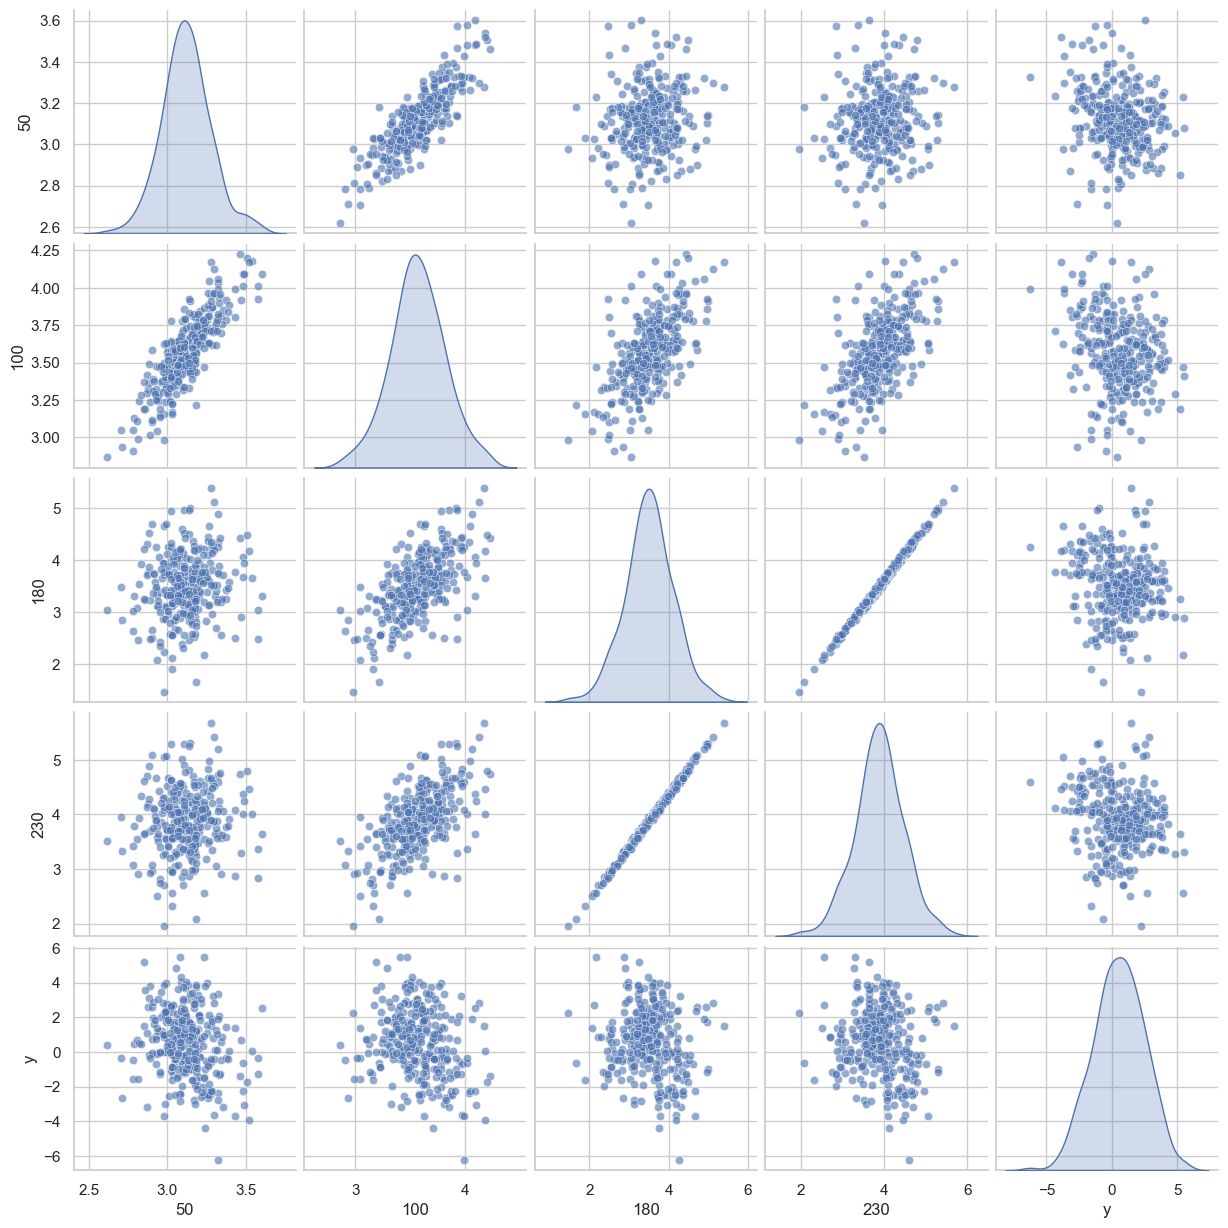

In [6]:
sns.pairplot(X_ft, diag_kind='kde', plot_kws={'alpha': 0.6})

/var/folders/0k/_fn4_dgn04b2b44_sfhbshzr0000gp/T/ipykernel_18657/2469964066.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ft.loc[:, "y"] = make_y(X, seed=24061)


<Axes: >

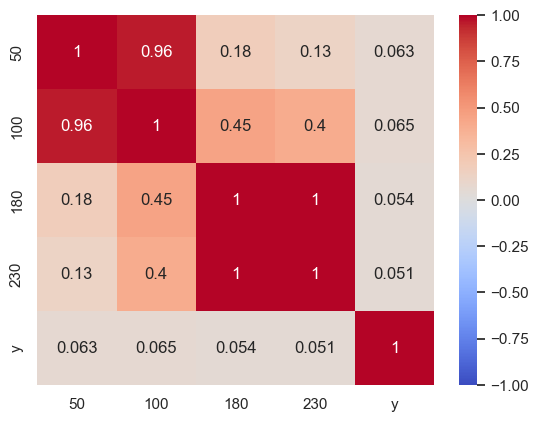

In [66]:
def make_y(X, noise=1, seed=None):
    if seed:
        np.random.seed(seed)
    # standardize feature matrix
    #Xstd = StandardScaler().fit_transform(X)
    n, p = X.shape

    # define linear and non-linear effects
    poly = 3
    idx_effects = [50, 100, 180, 230] 
    n_effects = len(idx_effects)

    deg = [i * np.pi / 2 for i in range(n_effects)]
    x_nonlinear = X[: , idx_effects]
    y = np.zeros(n)
    for i in range(n_effects):
        y += np.sin(x_nonlinear[:, i] ** poly + deg[i])
   
    # apply noise
    #y = np.log(y - y.min() + 1)
    ystd = np.std(y)
    y += np.random.normal(0, noise * ystd, n)
    
    # return
    return y


idx_nonlinear = [50, 100, 180, 230]
idx = idx_nonlinear
idx.sort()
dfX = pd.DataFrame(X)
X_ft = dfX.iloc[:, idx]
X_ft.loc[:, "y"] = make_y(X, seed=24061)
corr = X_ft.corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True)    

In [10]:
idx_effects = [50, 100, 180, 230] 
deg = [np.pi / 4 * i for i in range(4)]
Xs0 = X[:, idx_effects]
Xs = Xs0.copy()
for i in range(4):
    Xs[:, i] = np.sin(X[:, i]**3 + deg[i])
df = pd.DataFrame(np.concatenate((Xs, Xs0, y.reshape(-1, 1)), axis=1)) 


corr = df.corr()
print("Correlation: ", corr)


Correlation:            0         1         2         3         4         5         6  \
0  1.000000  0.635548 -0.035224 -0.717900  0.184633  0.187910 -0.015032   
1  0.635548  1.000000  0.676999 -0.038829 -0.033663  0.038346  0.041859   
2 -0.035224  0.676999  1.000000  0.641300 -0.222513 -0.120815  0.083871   
3 -0.717900 -0.038829  0.641300  1.000000 -0.281991 -0.215896  0.076613   
4  0.184633 -0.033663 -0.222513 -0.281991  1.000000  0.927065  0.063202   
5  0.187910  0.038346 -0.120815 -0.215896  0.927065  1.000000  0.392892   
6 -0.015032  0.041859  0.083871  0.076613  0.063202  0.392892  1.000000   
7 -0.022903  0.050000  0.101133  0.095249 -0.000647  0.336151  0.993878   
8  0.042795  0.203261  0.231352  0.108209 -0.296166 -0.324405 -0.277960   

          7         8  
0 -0.022903  0.042795  
1  0.050000  0.203261  
2  0.101133  0.231352  
3  0.095249  0.108209  
4 -0.000647 -0.296166  
5  0.336151 -0.324405  
6  0.993878 -0.277960  
7  1.000000 -0.256334  
8 -0.256334  1.0000

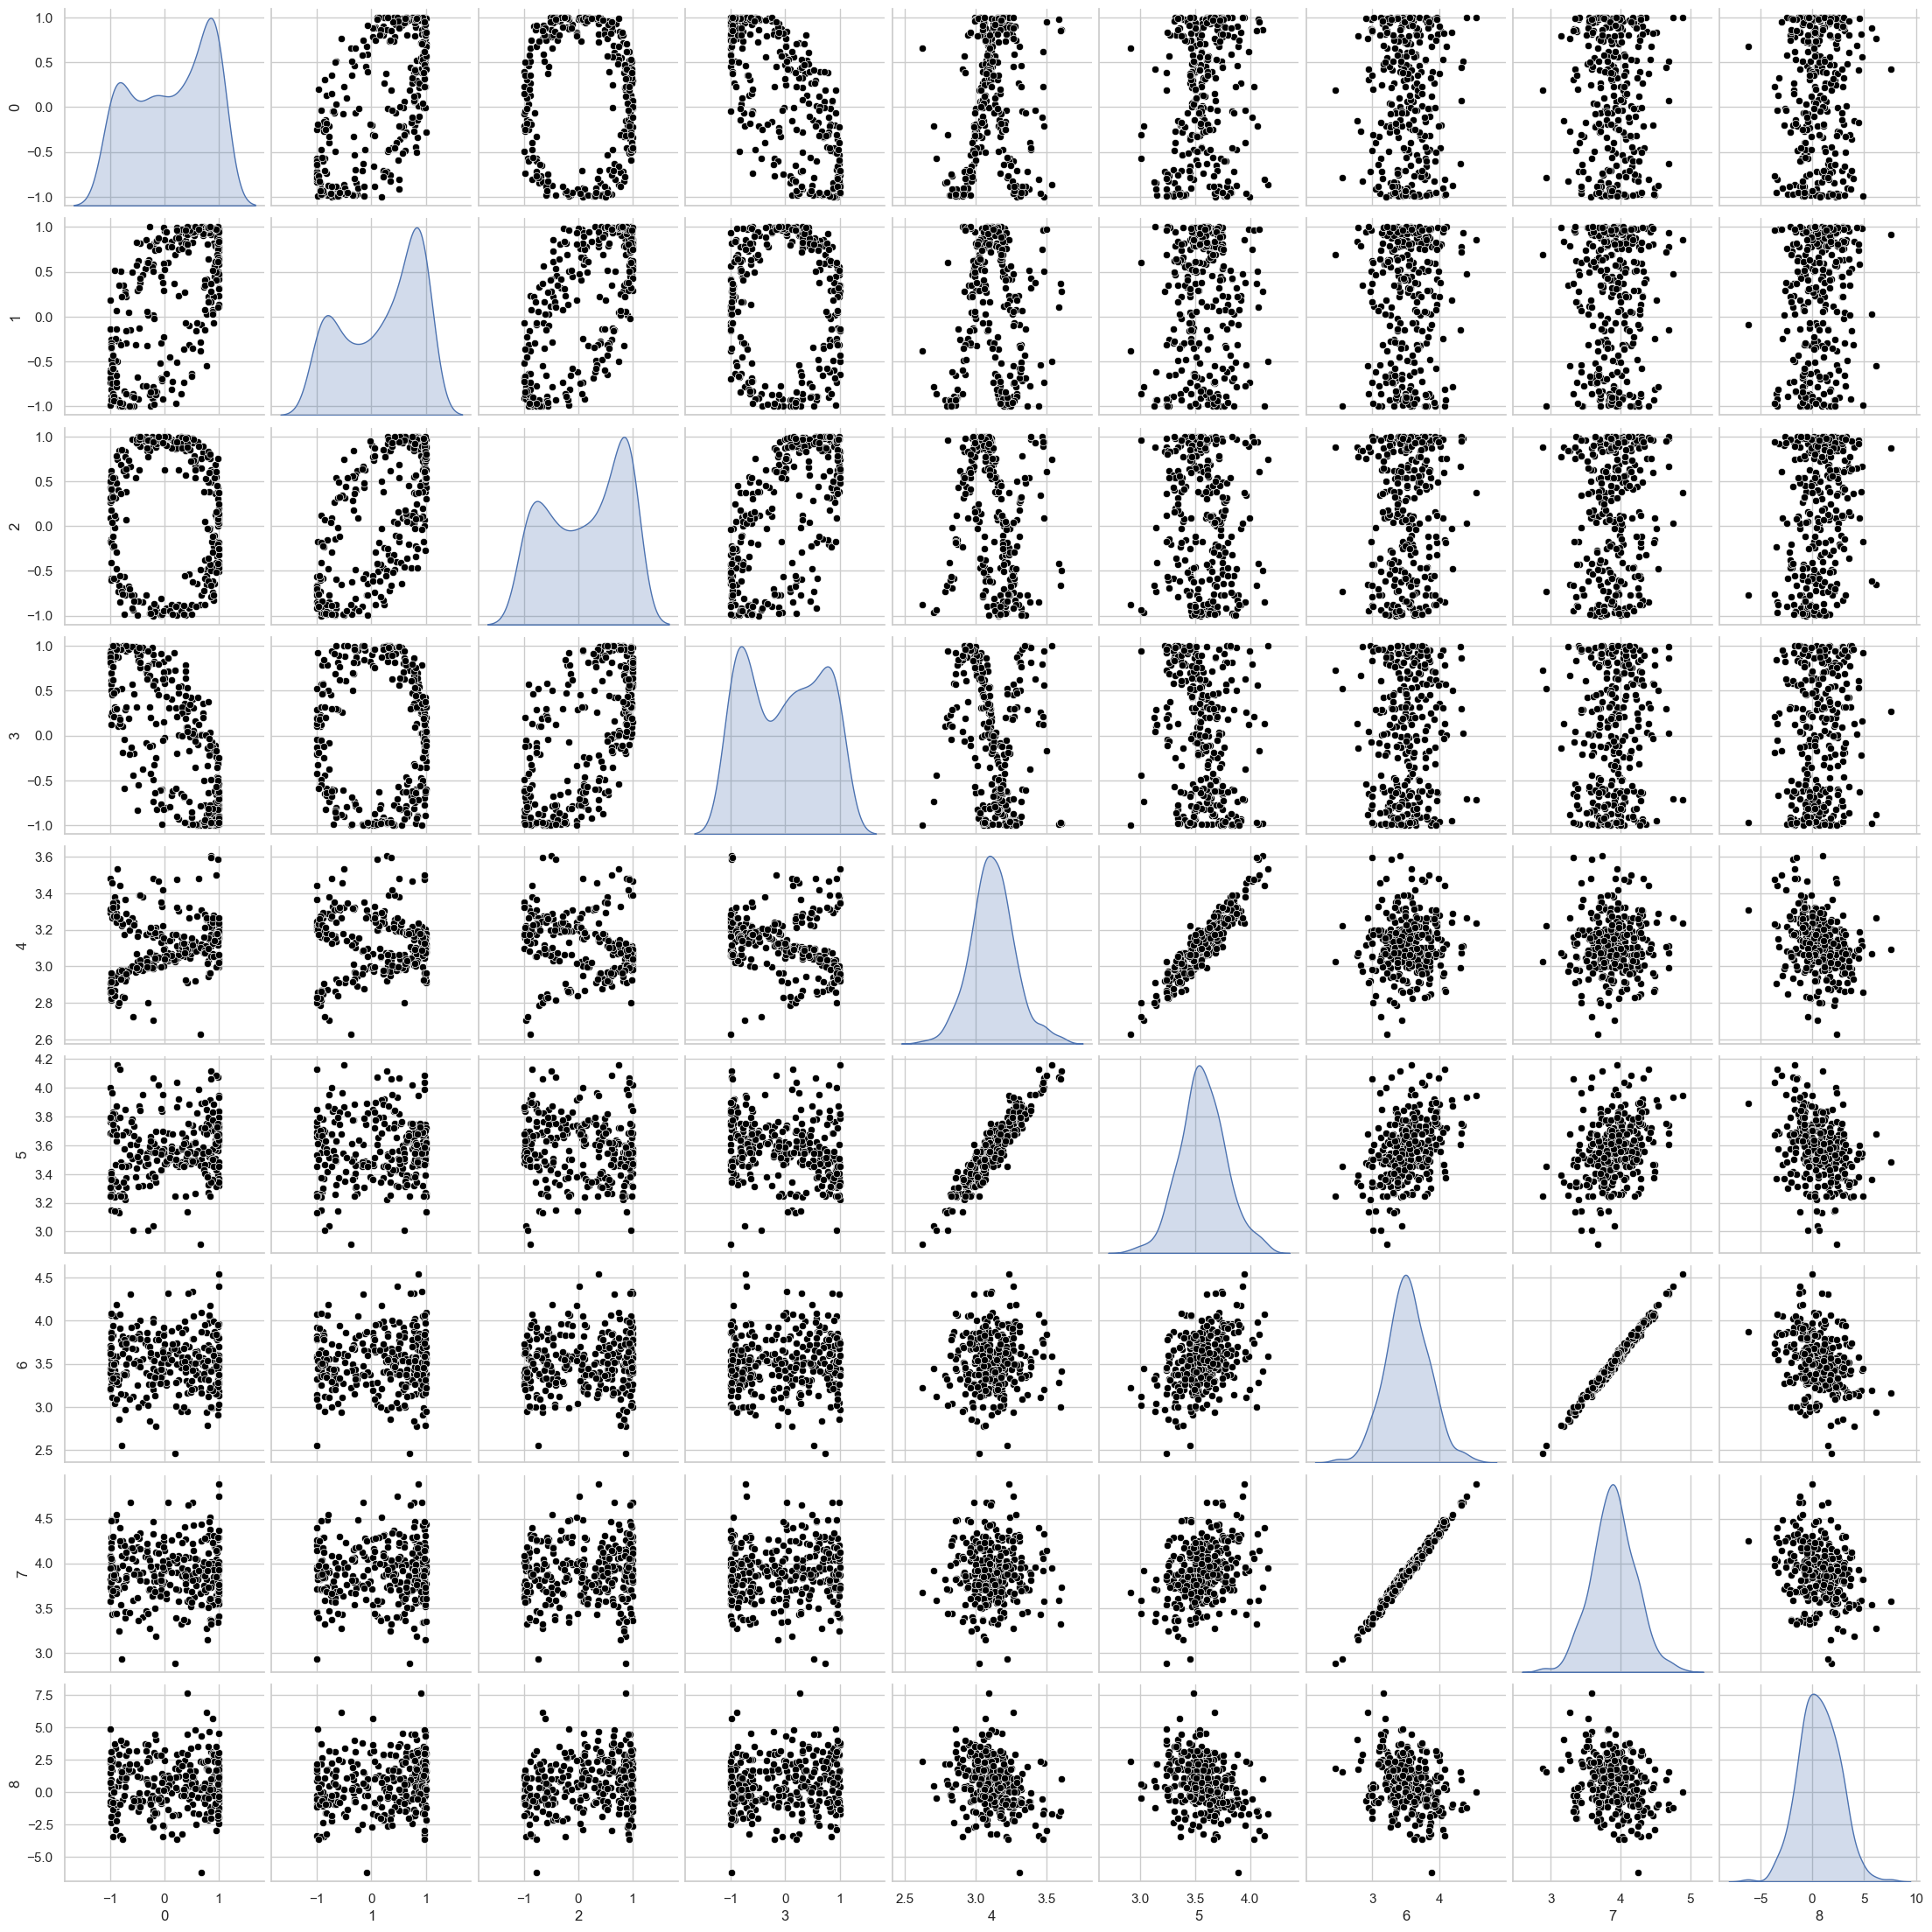

In [11]:
sns.pairplot(df, diag_kind="kde", plot_kws={"color": "black"})

In [11]:
def make_visdf(X, y, seasons):
    df = pd.DataFrame(X).reset_index()
    df["season"] = seasons
    df["y_cls"] = y > np.median(y)
    df = df.melt(id_vars=["index", "season", "y_cls"], var_name="spectra", value_name="reflectance")
    return df

def plot_X(X, effects):
    df = pd.DataFrame(X).reset_index()
    df["effects"] = effects
    df = df.melt(id_vars=["index", "effects"], 
                 var_name="band", value_name="intensity")
    sns.lineplot(data=df, x="band", y="intensity", hue="effects")

In [ ]:
sns.lineplot(x="spectra", y="reflectance", hue="season", data=df)
sns.lineplot(x="spectra", y="reflectance", hue="y_cls", data=df)

In [ ]:
n, p = X.shape
n_effect = n // 3
effects = ["summer"] * n_effect + ["fall"] * n_effect + ["winter"] * n_effect
plot_X(X, effects=effects)

In [ ]:
corX = pd.DataFrame(X).corr()
sns.heatmap(corX, cmap="coolwarm", center=0, square=True)

In [ ]:
idx_select = [0, 20, 41, 50, 100, 150, 200, 226, 250, 280]
Xs = X[:, idx_select]
plot_X(Xs, effects=effects)